In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/purchases-db/purchase.csv


In [2]:
# Read the updated dataframe and display the first 5 rows
df = pd.read_csv("/kaggle/input/purchases-db/purchase.csv")
df.head() 

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,01/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [42]:
# Remove null and duplicate records and display
df_no_null = df.dropna()
df_no_duplicates = df.drop_duplicates()
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,01/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [43]:
# Check the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1003 non-null   object 
 1   Branch                   1003 non-null   object 
 2   City                     1003 non-null   object 
 3   Customer type            1003 non-null   object 
 4   Gender                   1003 non-null   object 
 5   Product line             1002 non-null   object 
 6   Unit price               1003 non-null   float64
 7   Quantity                 1003 non-null   int64  
 8   Tax 5%                   1003 non-null   float64
 9   Total                    1003 non-null   float64
 10  Date                     1003 non-null   object 
 11  Time                     1003 non-null   object 
 12  Payment                  1002 non-null   object 
 13  cogs                     1003 non-null   float64
 14  gross margin percentage 

In [44]:
# Convert the 'Date' column from object to datetime64[ns]
df['Date'] = pd.to_datetime(df['Date'])

In [45]:
# Check if the 'Date' datatype had been correctly changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1003 non-null   object        
 1   Branch                   1003 non-null   object        
 2   City                     1003 non-null   object        
 3   Customer type            1003 non-null   object        
 4   Gender                   1003 non-null   object        
 5   Product line             1002 non-null   object        
 6   Unit price               1003 non-null   float64       
 7   Quantity                 1003 non-null   int64         
 8   Tax 5%                   1003 non-null   float64       
 9   Total                    1003 non-null   float64       
 10  Date                     1003 non-null   datetime64[ns]
 11  Time                     1003 non-null   object        
 12  Payment                  1002 non-

In [48]:
# Using the 'Date' column, create 'year', 'month' and 'day' columns
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [49]:
# Check if all three columns were created properly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1003 non-null   object        
 1   Branch                   1003 non-null   object        
 2   City                     1003 non-null   object        
 3   Customer type            1003 non-null   object        
 4   Gender                   1003 non-null   object        
 5   Product line             1002 non-null   object        
 6   Unit price               1003 non-null   float64       
 7   Quantity                 1003 non-null   int64         
 8   Tax 5%                   1003 non-null   float64       
 9   Total                    1003 non-null   float64       
 10  Date                     1003 non-null   datetime64[ns]
 11  Time                     1003 non-null   object        
 12  Payment                  1002 non-

In [50]:
# Calculate the sum of sales per city
sales_by_city = df.groupby('City')['Total'].sum().round(2).reset_index()
sales_by_city.head()

,City,Total
0,Mandalay,106788.11
1,Naypyitaw,110648.93
2,Yangon,106707.01


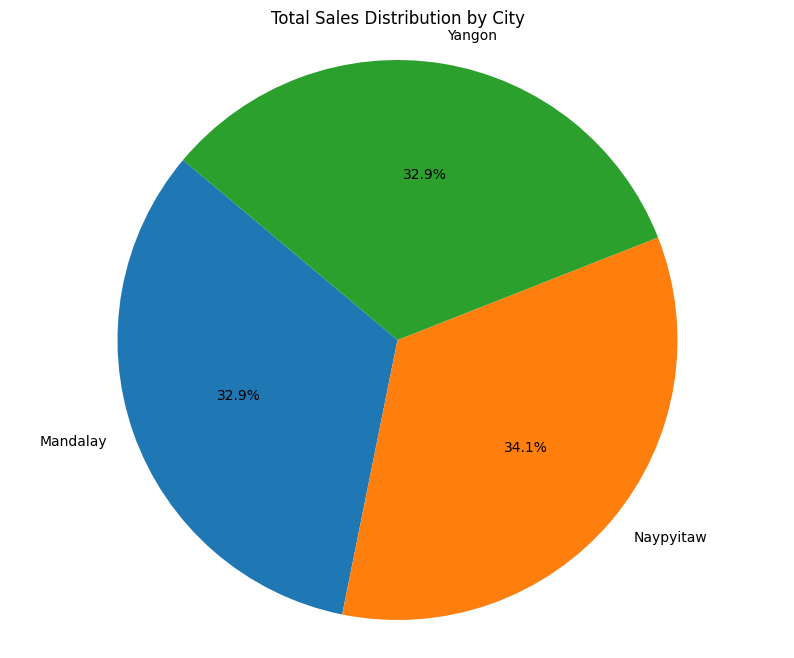

In [51]:
# Vizualizing the data for Total Sales Distribution by City 
plt.figure(figsize = (10, 8))
plt.pie(sales_by_city['Total'], labels = sales_by_city['City'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total Sales Distribution by City')
plt.show()

The pie chart shows us that the sales distribution between each city is approximately the same.

In [3]:
# Calculate the sum of sales by product line 
sales_by_product_line = df.groupby('Product line')['Total'].sum().reset_index().sort_values('Total', ascending = False)
sales_by_product_line.head()

,Product line,Total
2,Food and beverages,56144.8440
5,Sports and travel,55713.2625
0,Electronic accessories,54417.7515
1,Fashion accessories,54305.8950
4,Home and lifestyle,53777.2830


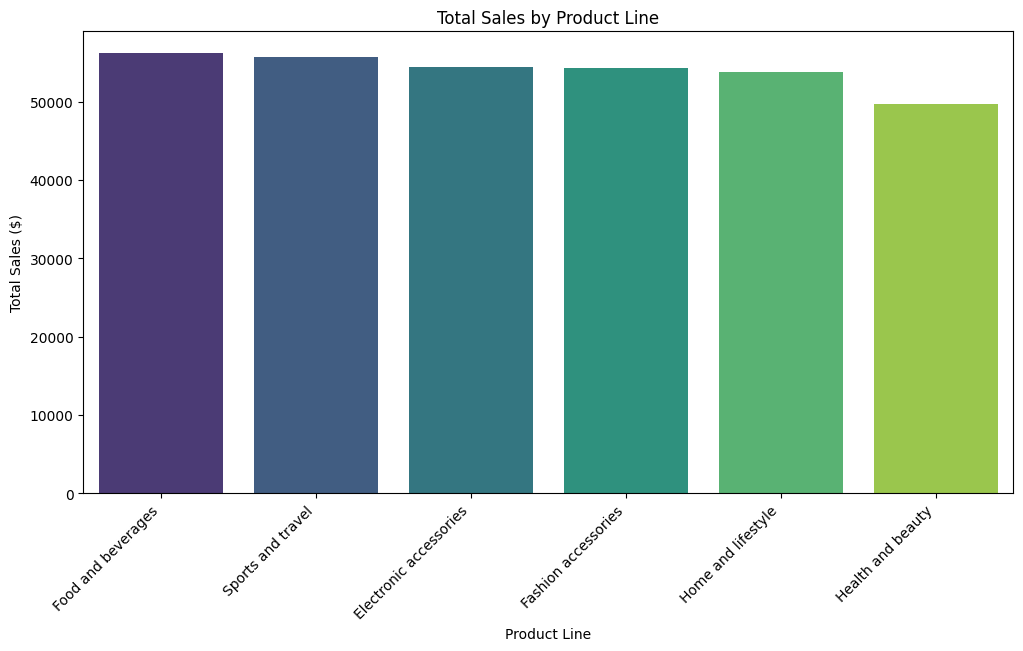

In [7]:
# Vizualizing the data for Total Sales by Product Line
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Product line', y = 'Total', data = sales_by_product_line, palette='viridis')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

The bar chart shows us that Food and Beverages have the highest amount of sales and that Health and Beauty have the lowest amount of sales.

In [9]:
# Create column named 'Time'
df['Time'] = pd.to_datetime(df['Time'])
# Create column named 'Hour'
df['Hour'] = df['Time'].dt.hour

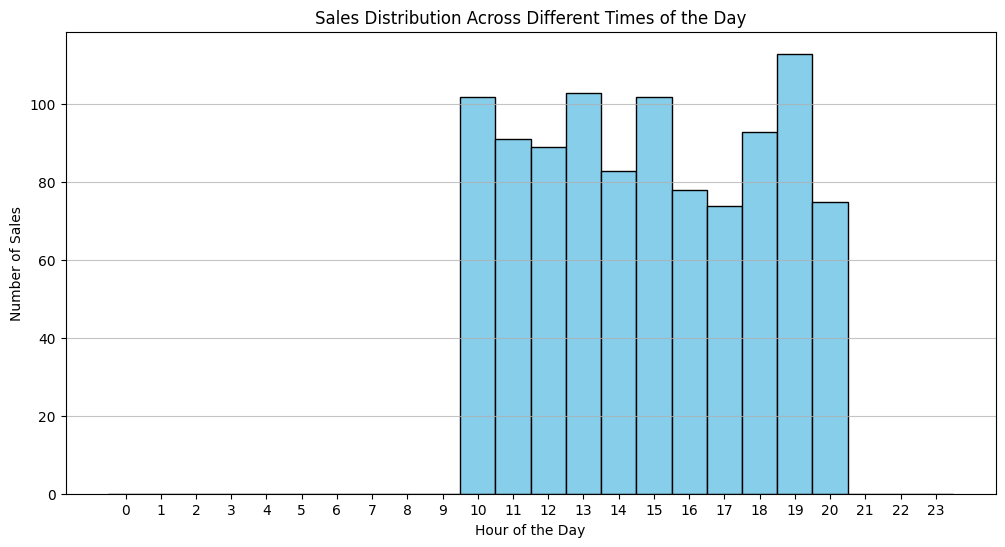

In [12]:
# Vizualizing the data for Sales Distribution Across Different Times of the Day
plt.figure(figsize=(12, 6))
plt.hist(df['Hour'], bins=range(25), align='left', color='skyblue', edgecolor='black')  # Using bins=range(25) to align bars with tick marks
plt.title('Sales Distribution Across Different Times of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sales')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.75)
plt.show()

Based on the bar chart we can determine the most popular time that customers make purchases is at 19:00.

In [60]:
# Calculate the sum of each payment method
payment_counts = df['Payment'].value_counts()
payment_counts.head()

Payment
Cash           346
Ewallet        344
Credit card    312
Name: count, dtype: int64

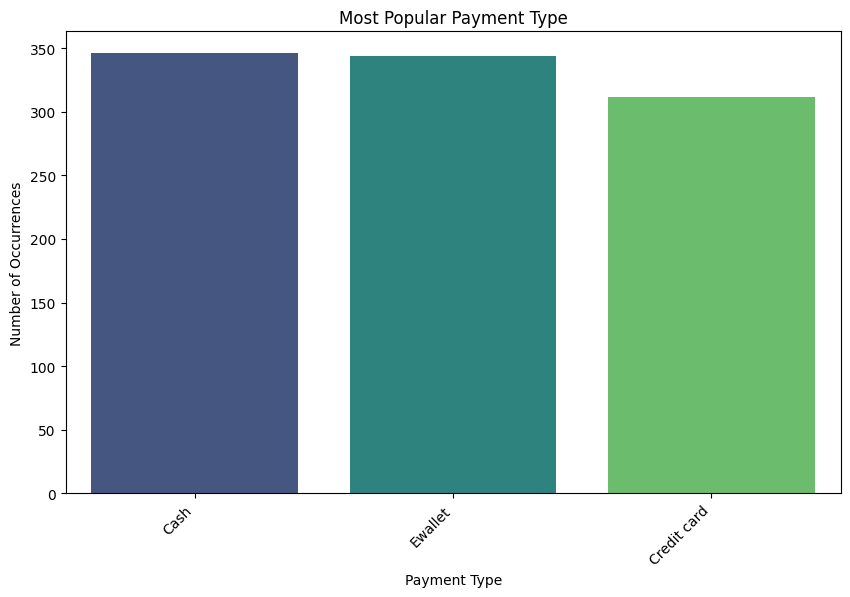

In [61]:
# Vizualizing the data for Most Popular Payment Type
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='viridis')
plt.title('Most Popular Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.show()

Based on the bar chart we can determine that the preferred payment type is by cash.

In [14]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract day of the week (0 = Monday, 6 = Sunday)
df['Day of Week'] = df['Date'].dt.dayofweek

# Group by day of the week to calculate total sales
sales_by_day_of_week = df.groupby('Day of Week')['Total'].sum()

# Mapping day of week to actual day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day_of_week.index = [day_names[i] for i in sales_by_day_of_week.index]

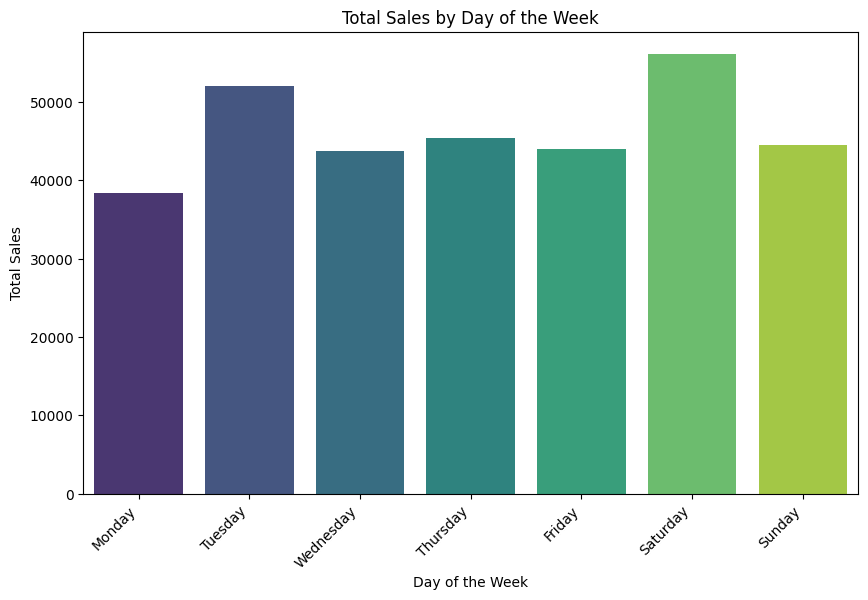

In [73]:
# Vizualizing the data for the Total Sales by Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_day_of_week.index, y=sales_by_day_of_week.values, palette='viridis')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

Based on the bar chart we can determine that Saturday has the highest total of sales.

In [16]:
# Count the number of transactions by gender and display the results 
sales_count_by_gender = df['Gender'].value_counts()
sales_count_by_gender.head()

Gender
Female    504
Male      499
Name: count, dtype: int64

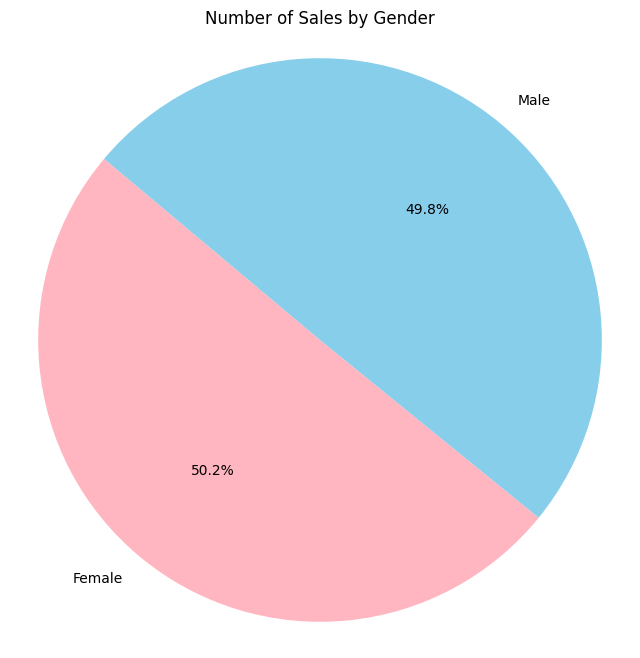

In [88]:
# Vizualizing the number of transactions by Gender as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_count_by_gender, labels=sales_count_by_gender.index, autopct='%1.1f%%', startangle=140, colors=['lightpink', 'skyblue'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Number of Sales by Gender')
plt.show()



Based on the pie chart we can see that distribution between male and female customers is approximately even.

In [85]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract day of the month
df['Day of Month'] = df['Date'].dt.day

# Group by day of the month to count the number of transactions
transactions_by_day = df['Day of Month'].value_counts().sort_index()

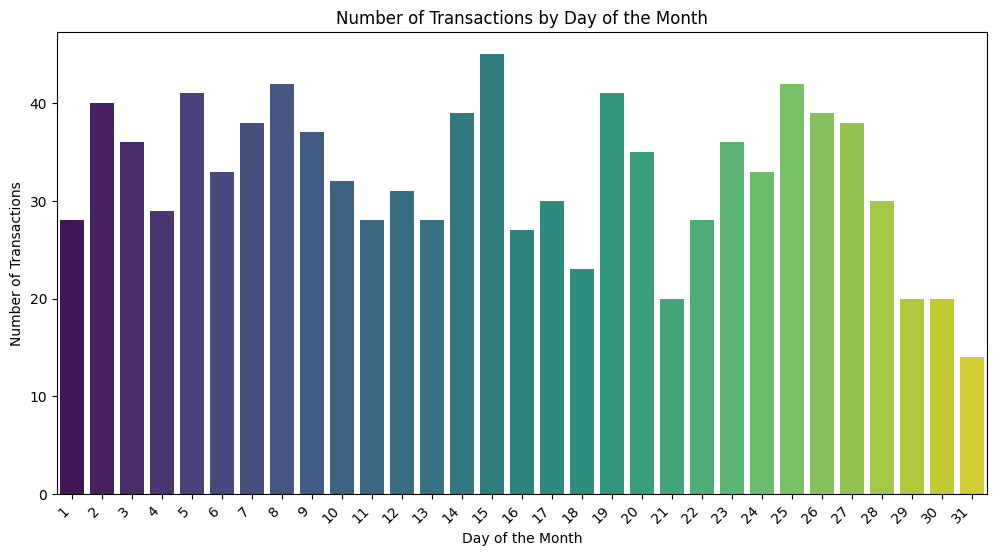

In [86]:
# Vizualizing the number of transactions by day of the month
plt.figure(figsize=(12, 6))
sns.barplot(x=transactions_by_day.index, y=transactions_by_day.values, palette='viridis')
plt.title('Number of Transactions by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.show()



Based on the bar chart we can see that the most popular day of the month to make purchases is on the 15th, the middle of the month.

In [18]:
# Extract year and month from 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by Year and Month to calculate total sales
monthly_sales = df.groupby(['Year', 'Month'])['Total'].sum().reset_index()

# Create a 'Year-Month' column for easier plotting
monthly_sales['Year-Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


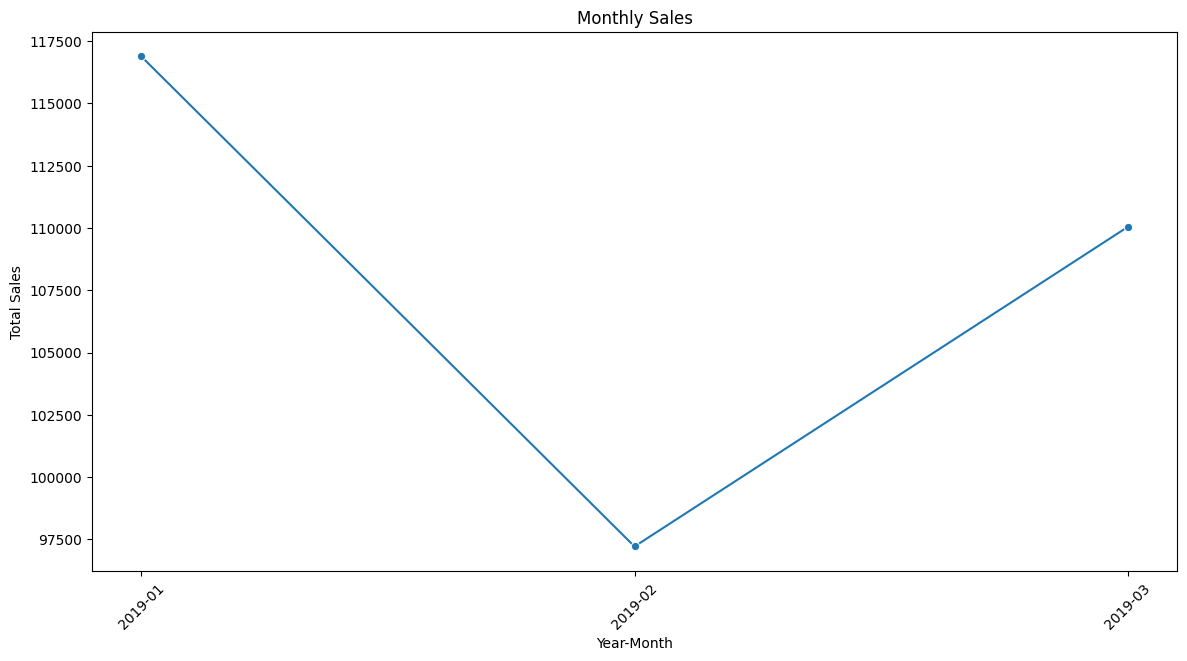

In [19]:
# Vizualizing the data for Monthly Sales
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year-Month', y='Total', data=monthly_sales, marker='o')
plt.title('Monthly Sales')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

Based on the line chart we can see that the highest monthly sales occurs in January. The sales decrease in February and increase again in March. 

In [22]:
# Calculating the average rating by branch and display
rating_by_branch = df.groupby('Branch')['Rating'].mean().reset_index()
rating_by_branch.head()

,Branch,Rating
0,A,7.019941
1,B,6.811111
2,C,7.080547


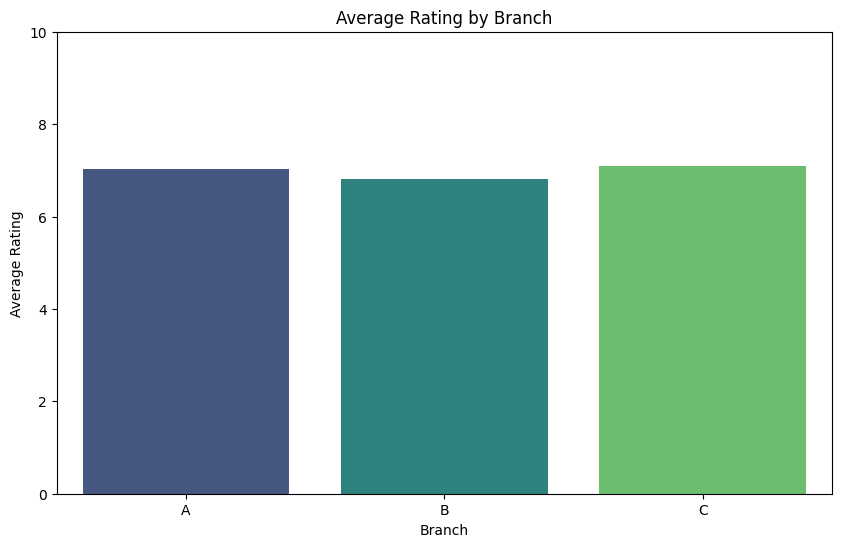

In [96]:
# Vizualizing the data for Average Rating by Branch
plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='Rating', data=rating_by_branch, palette='viridis')
plt.title('Average Rating by Branch')
plt.xlabel('Branch')
plt.ylabel('Average Rating')
plt.ylim(0, 10)  # Assuming rating scale is from 0 to 10
plt.show()

Based on the bar chart we can that all the branches have an average rating of approximately 7 out of 10 and that branch C has the highest rating out of the 3 branches.

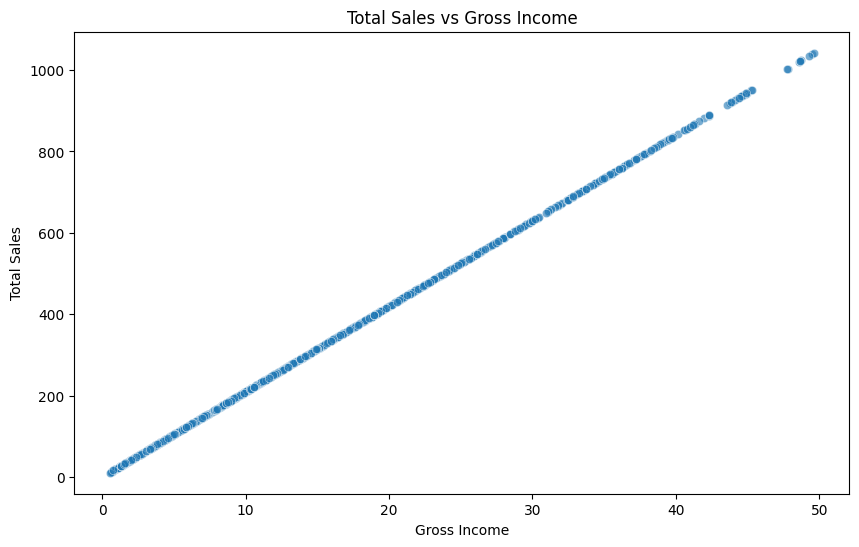

In [98]:
# Vizualizing the Total Sales vs Gross Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gross income', y='Total', data=df, alpha=0.6)
plt.title('Total Sales vs Gross Income')
plt.xlabel('Gross Income')
plt.ylabel('Total Sales')
plt.show()

Based on the scatter plot we can determine that the Total Sales and Gross Income have a directly proportional relationship. 